In [2]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation as FA
import matplotlib.animation as animation

In [3]:
def seperater(arr):
    # global maximum
    pre_data = arr
    amp = np.abs(pre_data)
    # amp = amp / maximum
    phs = np.angle(pre_data)
    # phs = (phs - (- pi)) / (pi - (- pi))
    # sin = np.sin(phs)
    # sin = (sin + 1) / 2
    seperated_data = np.stack((amp,phs), axis=0)
    # seperated_data = np.expand_dims(seperated_data, axis=0)
    return seperated_data

In [5]:
asphalt = np.load('./road_data/asphalt/alsphalt.npy')
asphalt = seperater(asphalt)
bicycle = np.load('./road_data/bicycle/bicycle.npy')
bicycle = seperater(bicycle)
bicycle2 = np.load('./road_data/bicycle/bicycle2.npy')
bicycle2 = seperater(bicycle2)
block = np.load('./road_data/block/block.npy')
block = seperater(block)
block2 = np.load('./road_data/block/block2.npy')
block2 = seperater(block2)
floor = np.load('./road_data/floor/floor.npy')
floor = seperater(floor)
ground = np.load('./road_data/ground/ground1.npy')
ground = seperater(ground)
ground = np.load('./road_data/ground/ground1.npy')

In [6]:
print(np.max(asphalt[1]))

3.141592653589793


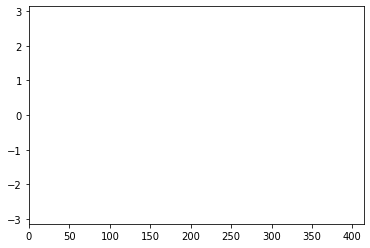

In [15]:
x, y = [], []
x = np.linspace(0,len(asphalt[0]), len(asphalt[0]))
fig = plt.figure()
ax = plt.axes(xlim = (0, asphalt.shape[2]), ylim = (-pi, pi))
# ax = plt.axes(xlim=(0,asphalt.shape[2]), ylim = (0,np.max(asphalt[0]))) # amp
line, = plt.plot([], [])

In [16]:
def animate(frame, *fargs):
    data = fargs[0]
    x = np.linspace(0, len(data[1][frame]), len(data[1][frame]))
    y = data[1][frame]
    line.set_data(x,y)
    return line

In [17]:
print(asphalt.shape)

(2, 300, 414)


In [18]:
def save_plot(data, name):
    ani = FA(fig, animate, frames=300, fargs = (data,), interval=100, repeat=True)
    FFwriter = animation.FFMpegWriter(fps=10)
    ani.save((str(name) + '.mp4'), writer=FFwriter)
    plt.show()

In [19]:
save_plot(asphalt, 'asphalt')
save_plot(floor, 'floor')
save_plot(block, 'block')
save_plot(block2, 'block2')
save_plot(bicycle, 'bicycle')
save_plot(ground, 'ground')

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg'

In [62]:
print(asphalt[1].shape)

(300, 414)


In [70]:
asphalt_mean = np.mean(asphalt[0], axis = 0)
floor_mean = np.mean(floor[0], axis = 0)
block_mean = np.mean(block[0], axis=0)
block2_mean = np.mean(block[0], axis=0)

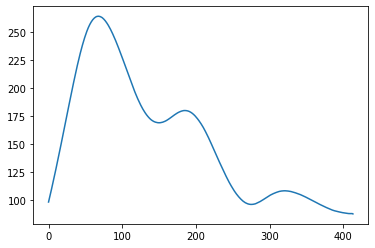

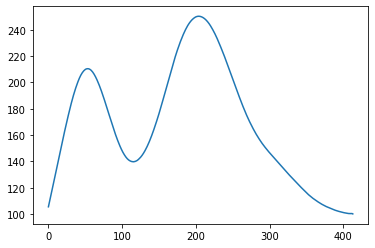

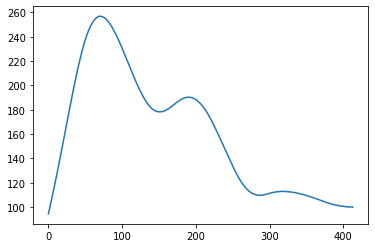

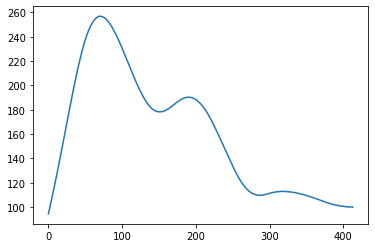

In [71]:
plt.plot(asphalt_mean)
plt.show()
plt.plot(floor_mean)
plt.show()
plt.plot(block_mean)
plt.show()
plt.plot(block2_mean)
plt.show()

In [60]:
asphalt_fn = './asphalt.mp4'
block_fn = './block.mp4'
block2_fn = './block2.mp4'
floor_fn = './floor.mp4'